# Notebook examples for Chapter 7
# Supervised Classification Part 2
Continuing on the subject of supervised
classification, Chapter 7  begins with a discussion  of
post classification processing methods to
improve  results on the basis of contextual
information, after which  attention is turned to statistical
procedures for evaluating classification accuracy and for making
quantitative comparisons between different classifiers. 
As examples of  _ensembles_  of
classifiers, the _adaptive boosting_
technique is examined, applying it in particular to improve the generalization
accuracy of neural networks, and  the _random forest_ classifier, an ensemble of _binary  decision trees_ is also described. The remainder of the Chapter examines  more specialized forms of supervised image classification, namely as applied to   polarimetric SAR imagery, to data with  hyper-spectral resolution, and to   intermediate and high  resolution multispectral imagery using _convolutional neural networks_, _transfer learning_ and _semantic segmentation_.

In [1]:
import ee
ee.Authenticate()
ee.Initialize()
%matplotlib inline

## 7.1 Postprocessing
### 7.1.1 Majority filtering

### 7.1.2. Probabilistic label relaxation

In [2]:
%run scripts/classify -a 6 -p [1,2,3,4,5] -L [10,10] -e 100 -P imagery/AST_20070501_pca.tif imagery/train.shp

2025-04-18 12:37:16.499734: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-18 12:37:16.502036: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 12:37:16.596386: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 12:37:16.967881: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-18 12:37:17.796311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Training with Dnn(tensorflow)
reading training data...


Warning 1: imagery/AST_20070501_pca.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


training on 4798 pixel vectors...
classes: ['WASSER [BL', 'RAPS [YELL', 'RUEBEN [CY', 'SIEDLUNG [', 'GEWERBE [M', 'NADELWALD', 'GETREIDE [', 'GRAS [RED2', 'LAUBWALD [', 'TAGEBAU [W']
elapsed time 17.41062092781067
classifying...
row: 0
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 505us/step
row: 100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 497us/step
row: 200
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 513us/step
row: 300
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 507us/step
row: 400
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 496us/step
row: 500
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 499us/step
row: 600
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 505us/step
row: 700
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 518us/step
row: 800
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 514us/step
row: 900
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2s 490us/step
elapsed time 16.18513822555542
class probabilities written to: imagery/AST_20070501_pca_classprobs.tif
thematic map written to: imagery/AST_20070501_pca_class.tif
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
test results written to: imag

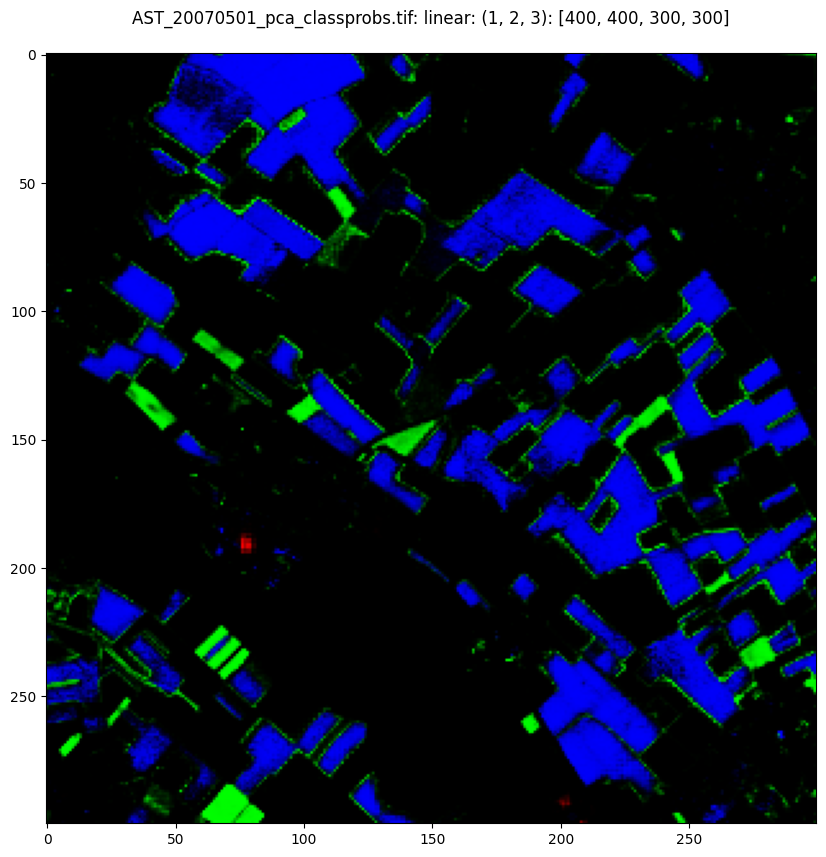

<Figure size 640x480 with 0 Axes>

In [3]:
%run scripts/dispms -f imagery/AST_20070501_pca_classprobs.tif -e 2 -p [1,2,3] -d [400,400,300,300]

In [4]:
run scripts/plr -i 3 imagery/AST_20070501_pca_classprobs.tif

       PLR
infile:  imagery/AST_20070501_pca_classprobs.tif
iterations:  3
estimating compatibility matrix...
label relaxation...
iteration 1
iteration 2
iteration 3
result written to: imagery/AST_20070501_pca_classprobs_plr.tif
elapsed time: 46.42857384681702
--done------------------------


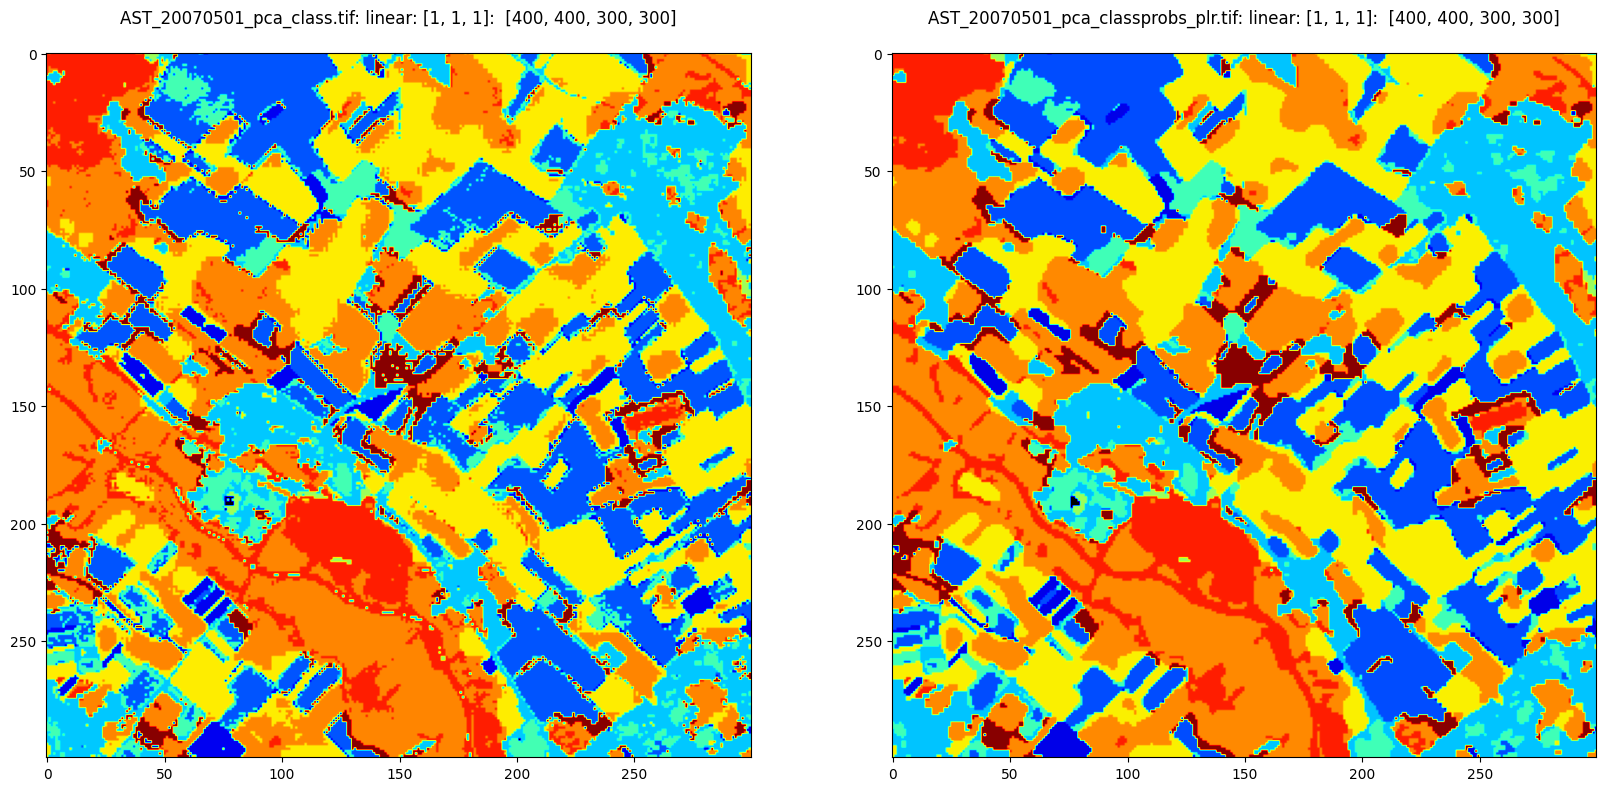

<Figure size 640x480 with 0 Axes>

In [5]:
%run scripts/dispms -f imagery/AST_20070501_pca_class.tif -c -d [400,400,300,300] \
-F imagery/AST_20070501_pca_classprobs_plr.tif -C -D [400,400,300,300] \
#-s '/home/mort/LaTeX/new projects/CRC5/Chapter7/fig7_1.eps'

## 7.2 Evaluation and comparison of classification accuracy

### 7.2.1 Accuracy assessment

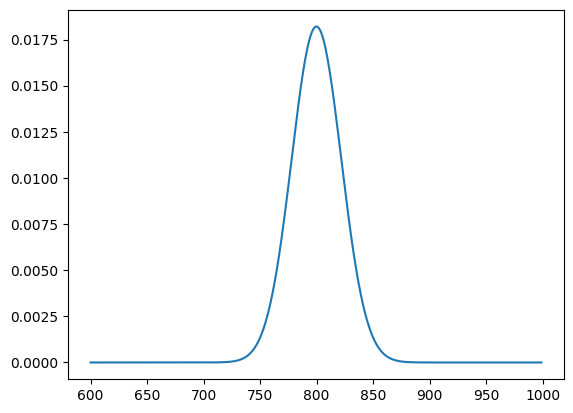

In [6]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

theta = 0.4
n = 2000
x = np.arange(600, 1000)
# pmf = probability mass function
plt.plot(x, binom.pmf(x, n, theta))

#plt.savefig('/home/mort/LaTeX/new projects/CRC4/Chapter7/fig7_2.eps')

In [7]:
run scripts/ct imagery/AST_20070501_pca_NNet(Congrad).tst

classification statistics
NNet(Congrad)test results for imagery/AST_20070501_pca.tif 
Wed Nov  6 11:19:17 2024
Classification image: imagery/AST_20070501_pca_class.tif 
Class probabilities image: imagery/AST_20070501_pca_classprobs.tif 

Misclassification rate: 0.032149
Standard deviation: 0.003628
Conf. interval (95 percent): [0.025763 , 0.040053]
Kappa coefficient: 0.963730
Standard deviation: 0.004094
Contingency Table
[[ 159.       0.       0.       0.       0.       0.       0.       0.       0.       0.     159.       1.   ]
 [   0.     177.       0.       0.       1.       0.       0.       0.       0.       0.     178.       0.994]
 [   0.       0.     258.       0.       0.       0.       0.       0.       0.       0.     258.       1.   ]
 [   0.       0.       0.     299.      13.       0.       0.       2.       0.       0.     314.       0.952]
 [   0.       0.       0.       5.     217.       0.       0.       0.       0.       0.     222.       0.977]
 [   0.       0.   

<Figure size 640x480 with 0 Axes>

### 7.2.2 Accuracy assessment on the GEE

In [8]:
import ee
ee.Initialize()
# first 4 principal components of ASTER image
image = ee.Image('projects/ee-mortcanty/assets/CRC5/AST_20070501_pca') \
                                      .select(0,1,2,3)
# training data
table = ee.FeatureCollection('projects/ee-mortcanty/assets/CRC5/train')
# sample the image with the polygons to a feature  
# collection, rename the class id columns from strings 
# to integers, add a column of random numbers in [0,1]
trainTestData = image.sampleRegions(collection=table,
                                properties=['CLASS_ID'],
                                scale=15) \
 .remap(list(map(str,range(10))),list(range(10)),
                                           'CLASS_ID') \
 .randomColumn('rand',seed=12345) 
# filter on the random column to split into training and
# test feature collections in the ration of 2:1
trainData = trainTestData.filter(ee.Filter.lt('rand',0.67))
testData = trainTestData.filter(ee.Filter.gte('rand',0.67))
print('train pixels: %i'%trainData.size().getInfo())
print('test pixels:  %i'%testData.size().getInfo())
# train a (default) SVM classifier on training data   
classifier = ee.Classifier.libsvm()
trained = classifier.train(trainData,'CLASS_ID',
                                   image.bandNames()) 
# test the trained classifier with the test data
tested = testData.classify(trained)
# generate a confusion matrix with the 
# classified test data
cm = tested.errorMatrix('CLASS_ID','classification')
# and from it determine the accuracy and kappa 
print('accuracy: %f'%cm.accuracy().getInfo())
print('kappa:    %f'%cm.kappa().getInfo())

train pixels: 4801
test pixels:  2372
accuracy: 0.946880
kappa:    0.939896


### 7.2.3 Crossvalidation on parallel architectures

In [2]:
!ipcluster start -n 4 --daemonize

2025-04-18 12:59:38.773 [IPClusterStart] Starting ipcluster with [daemonize=True]
2025-04-18 12:59:39.163 [IPController] Hub listening on tcp://127.0.0.1:54297 for registration.
2025-04-18 12:59:39.164 [IPController] Hub using DB backend: DictDB
2025-04-18 12:59:39.416 [IPController] hub::created hub
2025-04-18 12:59:39.416 [IPController] writing connection info to /home/mort/.ipython/profile_default/security/ipcontroller-client.json
2025-04-18 12:59:39.416 [IPController] writing connection info to /home/mort/.ipython/profile_default/security/ipcontroller-engine.json
2025-04-18 12:59:39.417 [IPController] task::using Python leastload Task scheduler
2025-04-18 12:59:39.429 [task] Task scheduler started [leastload]
2025-04-18 12:59:39.430 [broadcast-0] BroadcastScheduler 0 started
2025-04-18 12:59:39.430 [broadcast-00] BroadcastScheduler 00 started
2025-04-18 12:59:39.431 [IPController] Heartmonitor beating every 3000ms
2025-04-18 12:59:39.432 [IPController] client::client b'\x00k\x8bEg'

In [4]:
run scripts/crossvalidate -p [1,2,3,4,5] -a 6 -L [10,10] -e 100 imagery/AST_20070501_pca.tif imagery/train.shp

Warning 1: imagery/AST_20070501_pca.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


10-fold cross validation, algorithm: Dnn(Tensorflow)
reading training data...
7162 training pixel vectors were read in
attempting parallel calculation ...
available engines [0, 1, 2, 3]
execution time: 4.801817893981934
misclassification rate: 0.563951
standard deviation:     0.085985


### 7.2.4 Model comparison

In [ ]:
run scripts/classify -p [1,2,3,4,5] -a 6 -L [10,10] -e 500 imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
run scripts/classify -p [1,2,3,4,5] -a 7 imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
%run scripts/mcnemar imagery/AST_20070501_pca_SVM.tst \
imagery/AST_20070501_pca_Dnn(tensorflow).tst 

In [ ]:
run scripts/classify -p [1,2,3,4,5] -a 2  imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
%run scripts/mcnemar imagery/AST_20070501_pca_Gausskernel.tst \
imagery/AST_20070501_pca_Dnn(tensorflow).tst

## 7.3 Ensembles
### 7.3.1 Adaptive boosting

In [ ]:
run scripts/adaboost -p [1,2,3,4,5]  -L 10 -n 50 imagery/AST_20070501_pca.tif  imagery/train.shp

In [ ]:
%run scripts/dispms -f imagery/AST_20070501_pca_class.tif -c \
-r  "['WATER', 'RAPESEED', 'SUGARBEET', 'SUBURBAN', 'INDUSTRIAL', 'CONIFEROUS', 'GRAIN', 'GRASSLAND', 'HERBIFEROUS', 'OPENCAST']" \
#-s '/home/mort/LaTeX/new projects/CRC5/Chapter7/fig7_x.eps'

### 7.3.2 Binary decision trees and random forests

In [ ]:
run scripts/classify -p [1,2,3,4,5] -a 8  imagery/AST_20070501_pca.tif imagery/train.shp

In [ ]:
%run scripts/dispms -f imagery/AST_20070501_pca_class.tif -c \
-r  "['WATER', 'RAPESEED', 'SUGARBEET', 'SUBURBAN', 'INDUSTRIAL', 'CONIFEROUS', 'GRAIN', 'GRASSLAND', 'HERBIFEROUS', 'OPENCAST']"

In [ ]:
%run scripts/mcnemar imagery/AST_20070501_pca_Gausskernel.tst \
imagery/AST_20070501_pca_RF.tst

## 7.4 Classification of polarimetric SAR imagery

## 7.5 Hyperspectral image analysis
### 7.5.1 Spectral mixture modeling
### 7.5.2 Unconstrained linear unmixing

In [1]:
from osgeo import gdal
from osgeo.gdalconst import GA_ReadOnly
import numpy as np
import matplotlib.pyplot as plt

inDataset = gdal.Open('imagery/97_radianz_registriert_voll',GA_ReadOnly)                       
cols = inDataset.RasterXSize
rows = inDataset.RasterYSize    
bands = inDataset.RasterCount
print(rows, cols, bands)

512 614 224


ERROR 1: Maximum number of characters allowed reached.


In [2]:
Im = np.zeros((rows,cols,bands)) 
for b in range(bands):
    band = inDataset.GetRasterBand(b+1)
    Im[:,:,b] = band.ReadAsArray(0,0,cols,rows)  

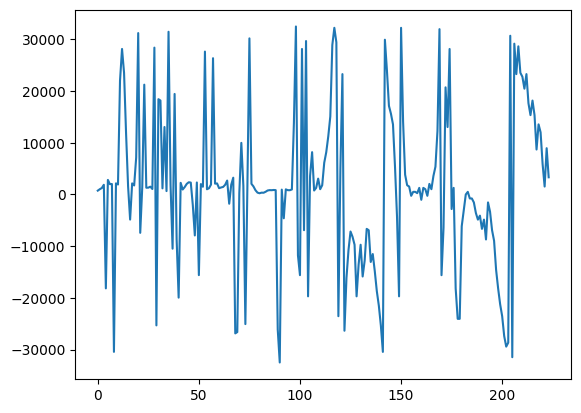

In [3]:
# spectral cut
plt.plot(Im[300,300,:])
#plt.savefig('/home/mort/LaTeX/new projects/CRC4/Chapter7/fig7_6.eps',bbox_inches='tight')

### 7.5.3 Intrinsic end-members and pixel purity

------------MNF ---------------
Mon Apr 21 12:17:27 2025
Input imagery/97_radianz_registriert_voll


ERROR 1: Maximum number of characters allowed reached.


Signal to noise ratios: [8.176397   5.2275453  4.3195086  2.9181838  2.5331788  2.2690113
 2.195611   2.0360427  1.7489603  1.7093334  1.6091063  1.5357301
 1.3793161  1.2976725  1.2197104  1.1656473  1.109391   1.0812812
 1.0492995  1.0363803  0.9592868  0.8728442  0.84626555 0.83644605
 0.80188596 0.7913779  0.75585747 0.74410915 0.73713434 0.69875026
 0.68781054 0.6800947  0.6698389  0.64265275 0.63974833 0.63259935
 0.62931275 0.6187433  0.6155267  0.6120652  0.6062727  0.5949068
 0.5930885  0.5872364  0.58242977 0.5785725  0.575614   0.57014716
 0.569322   0.5627202  0.55612826 0.5542084  0.5493144  0.54553616
 0.5439917  0.5419792  0.54117393 0.5379422  0.5349852  0.52995193
 0.5218158  0.519151   0.51607347 0.51372373 0.5118644  0.50964975
 0.50605047 0.5009295  0.4989127  0.49580038 0.49361134 0.4916891
 0.49010277 0.4873197  0.4858873  0.48411143 0.48317504 0.4807427
 0.47730327 0.4760946  0.4709202  0.46978903 0.46692216 0.46574378
 0.46271026 0.45855892 0.4543023  0.45317924

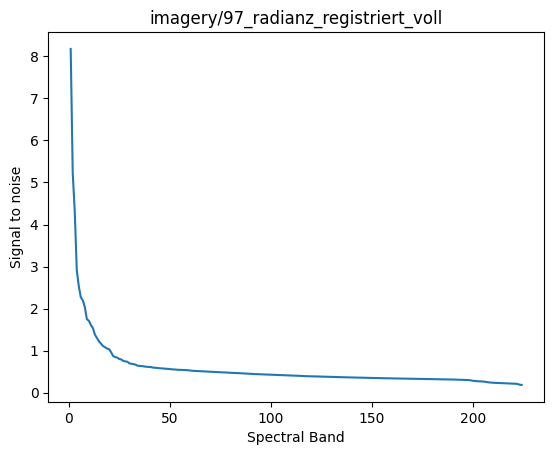

MNFs written to: imagery/97_radianz_registriert_voll_mnf
elapsed time: 6.986388921737671


In [4]:
run scripts/mnf.py imagery/97_radianz_registriert_voll

### 7.5.4 Anomaly detection: The RX algorithm

In [5]:
run scripts/rx imagery/AST_20070501_pca.tif

------------ RX ---------------
Mon Apr 21 12:17:47 2025
Input imagery/AST_20070501_pca.tif


Warning 1: imagery/AST_20070501_pca.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Result written to imagery/AST_20070501_pca_rx.tif
elapsed time: 0.31796789169311523


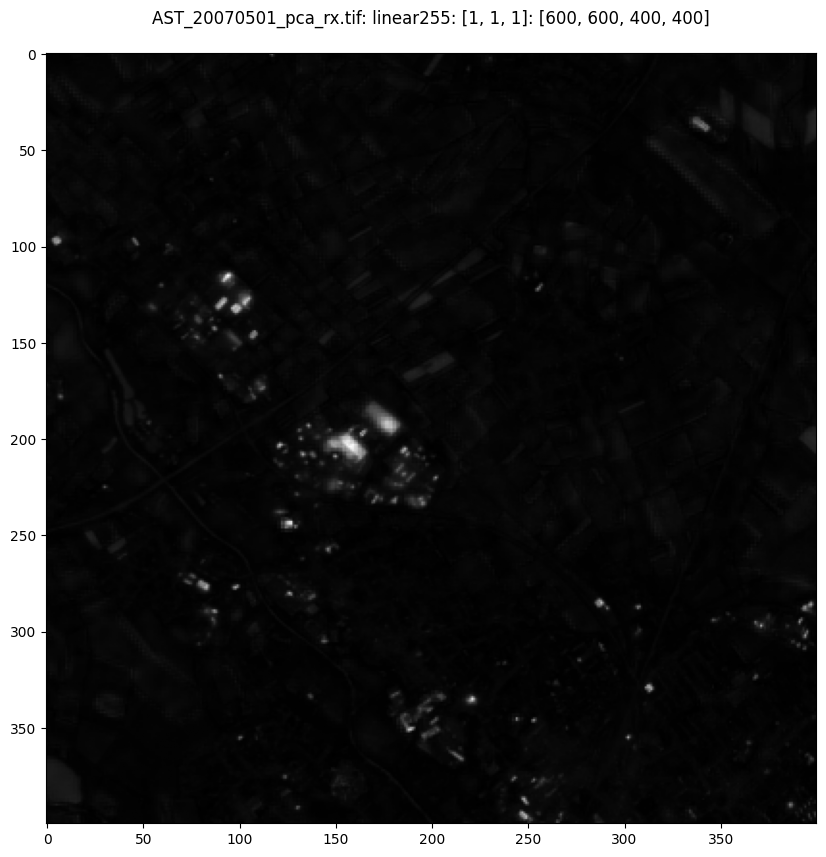

In [6]:
run scripts/dispms -f imagery/AST_20070501_pca_rx.tif -e 1 -d [600,600,400,400]

### 7.5.5 Anomaly detection: The kernel RX algorithm

In [7]:
run scripts/krx -s 2000 imagery/AST_20070501_pca.tif

Warning 1: imagery/AST_20070501_pca.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


------------ KRX ---------------
Mon Apr 21 12:18:07 2025
Input imagery/AST_20070501_pca.tif
GMA: 0.000000
row: 0
row: 100
row: 200
row: 300
row: 400
row: 500
row: 600
row: 700
row: 800
row: 900
Result written to imagery/AST_20070501_pca_krx.tif
elapsed time: 102.34706044197083


In [ ]:
%run scripts/dispms -f imagery/AST_20070501_pca_rx.tif -e 2 -d [600,600,250,250] \
-F imagery/AST_20070501_pca_krx.tif -E 2 -D [600,600,250,250] \
#-s '/home/mort/LaTeX/new projects/CRC5/Chapter7/fig7_9.eps'

## 7.6 Convolutional neural networks

### 7.6.1 Transfer learning

The examples in the text can be run on Google Colab with a GPU runtime. Use this link:

https://colab.research.google.com/drive/1aleipk9k16e5jAjR1FqcOl9NB7FUjLng

### 7.6.2 Semantic segmentation

These examples should be run on Google Colab with a GPU runtime. Use this link:

https://colab.research.google.com/drive/136YAVBZCwppz2SU-6Yxo1q2D2geyq0se